# Assignment 2 (Hopfield Network)

## 1) Storing the weights

In [27]:
import numpy as np
import pandas as pd
import random

class HopfieldNetwork:
    """
    Generic network, initiate with array of patterns
    number_of_weights = (n*(n-1))/2
    """
    def __init__(self, patterns):
        self.energies = []
        self.patterns = patterns
        self.patterns_matrix = np.array(patterns)
        self.weights = self.evaluate_weights()
        self.stable_patterns = self.evaluate_stable_patterns()
        self.current_states = []

    # def initiate_weights(self):
    #     """
    #     Initializes the basic structure of the weights dict
    #     which would something like this
    #       {"1,2": 0, "1,3": 0, "2,3": 0}
    #       where each key is a connection between two states
    #       ex. "1,2" is weight of connection between state 1 and 2
    #     """
    #     n = len(self.patterns[0])
    #     weights = {}
    #     for index in range(n):
    #         first_index = index + 1 # to make the 0 become 1 and so on
    #         second_index = first_index + 1
    #         while second_index <= n:
    #             weight_id = "{},{}".format(first_index, second_index)
    #             weights[weight_id] = "yoo"
    #             second_index = second_index + 1
    #     return weights

    # def calculate_weight_from_patterns(self,unit_1_index, unit_2_index):
    #     """
    #     Given two indices i, j
    #     loop over the different patterns and calculate the weight of the
    #     connection ij.
    #     """
    #     multiplicants = [pattern[unit_1_index] * pattern[unit_2_index] for pattern in self.patterns]
    #     return np.array(multiplicants).sum()

    def evaluate_weights(self):
        """
        Evaluate weights of the network based on self.patterns
        This is done by looping through all (n*(n-1))/2 connections of the
        network (where n is number of states). For each connection we get the
        i, j indices and calculate the weight for it.
        """
        # weights = self.initiate_weights()
        # print(self.patterns)
        # print(weights)
        # for weight_key in weights.keys():
        #     unit_1_index = int(weight_key.split(",")[0]) - 1
        #     unit_2_index = int(weight_key.split(",")[1]) - 1
        #     calculated_weight = self.calculate_weight_from_patterns(unit_1_index, unit_2_index)
        #     weights[weight_key] = calculated_weight
        weights_matrix = np.dot(self.patterns_matrix.transpose(), self.patterns_matrix)
        np.fill_diagonal(weights_matrix, 0)
        return weights_matrix

    def state_update(self, state_index):
        """
        Updates the state of the given state (by index) using the pattern given.
        The value of each connected state is fetched and multiplied by the weight
        of the connection between these two states.
        Then a sum of these multipels is returned.
        """
        # current_state_index = str(state_index + 1)
        # relevant_weights = {k: v for k, v in self.weights.items() if current_state_index in k.split(",")}
        # multiplications = []
        # for relevant_weight_key, relevant_weight_value in relevant_weights.items():
        #     other_state = [idx for idx in relevant_weight_key.split(",") if idx != current_state_index][0]
        #     other_state_index = int(other_state) - 1
        #     multiplications.append(self.current_states[other_state_index] * relevant_weight_value)
        # return np.sign(np.array(multiplications).sum())
        return np.sign(np.dot(self.weights[state_index], self.current_states))
    
    def calculate_energy(self):
        """
        Calculates the intermediate energy of state in a pattern
        by multiplying each weight with the i_th and j_th states
        """
        # sum_per_state = []
        # for state_index in range(len(self.current_states)):
        #     current_state_index = str(state_index+1)
        #     relevant_weights = {k: v for k, v in self.weights.items() if current_state_index in k.split(",")}
        #     energy_multiples = []
        #     for relevant_weight_key, relevant_weight_value in relevant_weights.items():
        #         other_state = [idx for idx in relevant_weight_key.split(",") if idx != current_state_index][0]
        #         other_state_index = int(other_state) - 1
        #         energy_multiples.append(relevant_weight_value * self.current_states[state_index] * self.current_states[other_state_index])
        #     sum_per_state.append(np.array(energy_multiples).sum())
        # return np.array(sum_per_state).sum() * -1
        return np.dot(
    
    def evaulate_pattern_stability(self, pattern, log=False):
        """
        Returns True if every state is stable for this pattern
        False otherwise
        """
        print("====================")
        print("Input Pattern: {}".format(pattern))
        state_energies = []
        self.current_states = pattern.copy()
        for state_index in random.sample(range(len(pattern)), len(pattern)):
            updated_state_value = self.state_update(state_index)
            energy = self.calculate_energy()
            state_energies.append(energy)
            print("energy after updating state {}: {}".format(state_index+1, energy))
            self.current_states[state_index] = updated_state_value
        print("Current states after this pattern: {}".format(self.current_states))
        matched = self.current_states == pattern
        print("stable: {}".format(matched))
        return [matched, state_energies]

    def evaluate_stable_patterns(self):
        """
        Goes through the network and calculates which states are stable.
        """
        stable_patterns = []
        for pattern in self.patterns:
            if self.evaulate_pattern_stability(pattern)[0]:
                stable_patterns.append(pattern)
        return stable_patterns
    
    def calculate_energies(self, pattern):
        """
        Returns energies calculated while updating the states
        of the network based on the given pattern.
        """
        stable, energies = self.evaulate_pattern_stability(pattern, log=True)
        return energies

pattern_1 = [1, -1, 1, -1]
pattern_2 = [-1, 1, 1, 1]
pattern_3 = [-1, -1, -1, 1]

patterns = [pattern_1, pattern_2, pattern_3]
hopfield_network = HopfieldNetwork(patterns)
hopfield_network.stable_patterns

# x = np.array(patterns)
# weights = np.dot(x.transpose(), x)
# np.fill_diagonal(weights, 0)
# np.dot(weights[0], np.array(pattern_1).transpose())

Input Pattern: [1, -1, 1, -1]
Current states after this pattern: [1, -1, 1, -1]
stable: True
Input Pattern: [-1, 1, 1, 1]
Current states after this pattern: [-1, 1, -1, 1]
stable: False
Input Pattern: [-1, -1, -1, 1]
Current states after this pattern: [-1, 1, -1, 1]
stable: False


[[1, -1, 1, -1]]

### Summary

Only the pattern [1, -1, 1, -1] **(pattern A)** is stable. Tested this by 
1. Updating the state for each unit using the given function
2. Tested if the "pattern state" matches the "evaluated state"
3. If 2 is True for all states, then a pattern is stable

### 2) What does the network converge to in states A/B/C

- **Pattern A** remains itself
- **Pattern B** changes to [-1, 1, -1, 1]
- **Pattern C** changes to [-1, 1, -1, 1]

Input Pattern: [1, -1, 1, -1]
Current states after this pattern: [1, -1, 1, -1]
stable: True
Input Pattern: [-1, 1, 1, 1]
Current states after this pattern: [-1, 1, -1, 1]
stable: False
Input Pattern: [-1, -1, -1, 1]
Current states after this pattern: [-1, 1, -1, 1]
stable: False


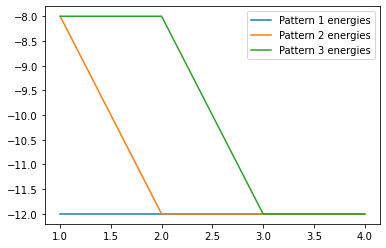

In [5]:
import matplotlib.pyplot as plt
  
pattern_1_energies = hopfield_network.calculate_energies(pattern_1)
pattern_2_energies = hopfield_network.calculate_energies(pattern_2)
pattern_3_energies = hopfield_network.calculate_energies(pattern_3)

t = [1,2,3,4]

plt.plot(t, pattern_1_energies, label = "Pattern 1 energies")
plt.plot(t, pattern_2_energies, label = "Pattern 2 energies")
plt.plot(t, pattern_3_energies, label = "Pattern 3 energies")
plt.legend()
plt.show()


### 3) Loading images and using hopfield network on it

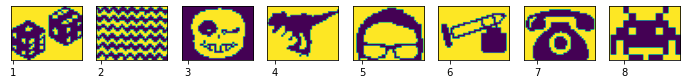

In [6]:
def plot_images(images):
    nr_images = images.shape[0]
    fig = plt.figure()
    fig.set_figwidth(12)
    for m in range(nr_images):
        plt.subplot(1, 8, m+1)
        plt.imshow(images[m])
        plt.xticks([m+1])
        plt.yticks([])
    plt.show()

images = np.load("images.npz")["arr_0"]
plot_images(images)

In [8]:
images_vectors = images.reshape(8, images.shape[1]*images.shape[2])
hopfield_network = HopfieldNetwork([images_vectors[0], images_vectors[1], images_vectors[2]])
hopfield_network.weights

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Input Pattern: [1. 1. 1. ... 1. 1. 1.]


KeyboardInterrupt: 